# Titanic

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
titanic = pd.read_csv('./dataset/titanic.csv')
titanic.shape

(891, 12)

In [106]:
df = titanic.copy()

In [107]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [109]:
# 결측치 확인
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [110]:
# 중복 확인
df.duplicated().sum()

0

<AxesSubplot:>

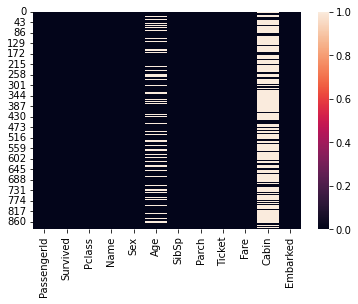

In [111]:
# 결측치 시각화
sns.heatmap(df.isna())  # 밝은 부분이 결측치

In [112]:
# 결측치 보여주는 라이브러리 
#! pip install missingno

<AxesSubplot:xlabel='Survived', ylabel='count'>

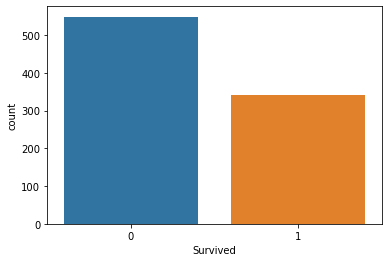

In [113]:
sns.countplot(x='Survived', data=df)

In [114]:
# 생존자 수 확인, 사망자 수 확인
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [115]:
# 생존률 확인
df['Survived'].value_counts() / df.shape[0]

0    0.616162
1    0.383838
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Sex', ylabel='count'>

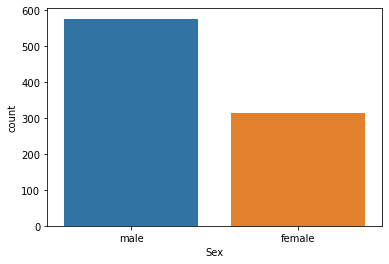

In [116]:
sns.countplot(x='Sex',data=df)

In [117]:
# 남/여 수 확인
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [118]:
# 남/여 비율
df.Sex.value_counts() / df.shape[0]

male      0.647587
female    0.352413
Name: Sex, dtype: float64

In [119]:
# 성별에 따른 생존자 수

<AxesSubplot:xlabel='Survived', ylabel='count'>

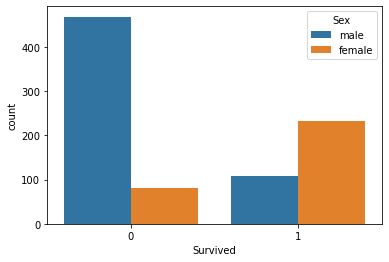

In [120]:
sns.countplot(x='Survived', hue='Sex', data=df)

In [121]:
df.groupby(["Survived","Sex"]).count()

PassengerId  Pclass  Name  Age  SibSp  Parch  Ticket  Fare  \
Survived Sex                                                                  
0        female           81      81    81   64     81     81      81    81   
         male            468     468   468  360    468    468     468   468   
1        female          233     233   233  197    233    233     233   233   
         male            109     109   109   93    109    109     109   109   

                 Cabin  Embarked  
Survived Sex                      
0        female      6        81  
         male       62       468  
1        female     91       231  
         male       45       109

In [122]:
df.groupby("Survived").Sex.value_counts()

Survived  Sex   
0         male      468
          female     81
1         female    233
          male      109
Name: Sex, dtype: int64

In [123]:
# 객실 등급에 따른 생존자
# 객실과 성별에 따른 생존자
# 탑승 항구별 생존자

<AxesSubplot:xlabel='Pclass', ylabel='count'>

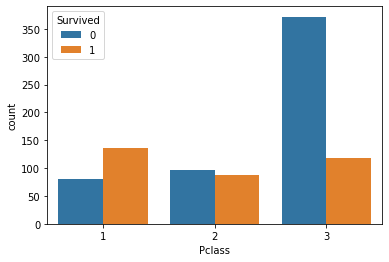

In [124]:
sns.countplot(x="Pclass", hue='Survived',data=df)

In [125]:
x = df.groupby(['Pclass','Sex'])['Survived'].value_counts()
x

Pclass  Sex     Survived
1       female  1            91
                0             3
        male    0            77
                1            45
2       female  1            70
                0             6
        male    0            91
                1            17
3       female  0            72
                1            72
        male    0           300
                1            47
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

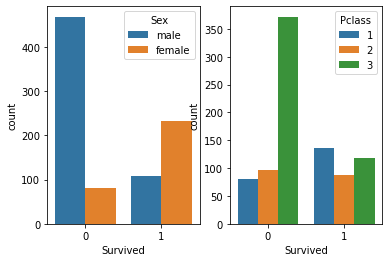

In [126]:
fig, axes = plt.subplots(1,2)
sns.countplot(x='Survived', hue='Sex',data=df, ax=axes[0])
sns.countplot(x='Survived', hue='Pclass',data=df, ax=axes[1])

In [127]:
df.groupby(["Pclass","Survived"]).Sex.value_counts()

Pclass  Survived  Sex   
1       0         male       77
                  female      3
        1         female     91
                  male       45
2       0         male       91
                  female      6
        1         female     70
                  male       17
3       0         male      300
                  female     72
        1         female     72
                  male       47
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Embarked', ylabel='count'>

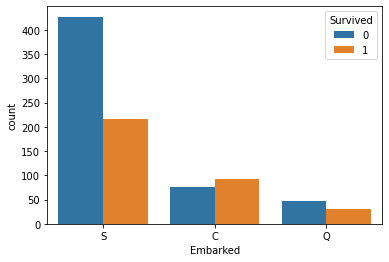

In [128]:
# 탑승 항구별 생존자
sns.countplot(x='Embarked', hue='Survived',data=df)

In [129]:
df.groupby("Embarked").Survived.value_counts()

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64

---
### 전처리

In [130]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [131]:
# 필요없는 컬럼 삭제
df=df.drop(["PassengerId","Cabin"],axis=1)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [132]:
df=df.drop(["Ticket"],axis=1)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [133]:
# Survived 인코딩
# df["Survived"] = df["Survived"].map({"saved":0,"lost":1})

In [134]:
# Pclass 인코딩
# df["Pclass"] = df["Pclass"].map({"1st":0,"2st":1,"3st":2})

In [135]:
# Embarked 인코딩
df["Embarked"] = df["Embarked"].map({"C":0,"Q":1,"S":2})

In [136]:
# Sex 인코딩
df['Sex'] = df['Sex'].map({"male":1, "female":0})

In [137]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,2.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,0.0
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,2.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,2.0
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,2.0


In [138]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [139]:
df.Embarked.value_counts()

2.0    644
0.0    168
1.0     77
Name: Embarked, dtype: int64

In [140]:
df["Embarked"]=df["Embarked"].fillna(2)

In [141]:
df.Embarked.value_counts()

2.0    646
0.0    168
1.0     77
Name: Embarked, dtype: int64

In [142]:
# Age 결측치 해결

In [144]:
# 나이가 NaN인 데이터 표시
df[df['Age'].isna()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
5,0,3,"Moran, Mr. James",1,NaN,0,0,8.4583,1.0
17,1,2,"Williams, Mr. Charles Eugene",1,NaN,0,0,13.0000,2.0
19,1,3,"Masselmani, Mrs. Fatima",0,NaN,0,0,7.2250,0.0
26,0,3,"Emir, Mr. Farred Chehab",1,NaN,0,0,7.2250,0.0
28,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",0,NaN,0,0,7.8792,1.0
...,...,...,...,...,...,...,...,...,...
859,0,3,"Razi, Mr. Raihed",1,NaN,0,0,7.2292,0.0
863,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",0,NaN,8,2,69.5500,2.0
868,0,3,"van Melkebeke, Mr. Philemon",1,NaN,0,0,9.5000,2.0
878,0,3,"Laleff, Mr. Kristo",1,NaN,0,0,7.8958,2.0


In [145]:
df.Name.str.extract("([A-Za-z]+)\.")   # Mr.이런것들 끌어오는 정규표현식

,0
0,Mr
1,Mrs
2,Miss
3,Mrs
4,Mr
...,...
886,Rev
887,Miss
888,Miss
889,Mr


In [146]:
df['Initial']=df.Name.str.extract("([A-Za-z]+)\.")
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Initial
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,2.0,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,0.0,Mrs
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,2.0,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,2.0,Mrs
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,2.0,Mr


In [147]:
df['Initial'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [148]:
be = ['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don']
af = ['Miss','Mrs','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr']

In [150]:
df['Initial'] = df['Initial'].replace(be,af)
df['Initial'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

In [156]:
# 호칭별 나이명칭

am=round(df.groupby("Initial").Age.mean(),1)
am

Initial
Master     4.6
Miss      21.8
Mr        32.7
Mrs       35.9
Other     45.9
Name: Age, dtype: float64

In [158]:
am['Master']

4.6

In [159]:
# 나이가 NaN인 데이터 표시
df[df['Age'].isna()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Initial
5,0,3,"Moran, Mr. James",1,NaN,0,0,8.4583,1.0,Mr
17,1,2,"Williams, Mr. Charles Eugene",1,NaN,0,0,13.0000,2.0,Mr
19,1,3,"Masselmani, Mrs. Fatima",0,NaN,0,0,7.2250,0.0,Mrs
26,0,3,"Emir, Mr. Farred Chehab",1,NaN,0,0,7.2250,0.0,Mr
28,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",0,NaN,0,0,7.8792,1.0,Miss
...,...,...,...,...,...,...,...,...,...,...
859,0,3,"Razi, Mr. Raihed",1,NaN,0,0,7.2292,0.0,Mr
863,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",0,NaN,8,2,69.5500,2.0,Miss
868,0,3,"van Melkebeke, Mr. Philemon",1,NaN,0,0,9.5000,2.0,Mr
878,0,3,"Laleff, Mr. Kristo",1,NaN,0,0,7.8958,2.0,Mr


In [160]:
그룹별로 나이가nan이고 master이면 

SyntaxError: invalid syntax (1157818823.py, line 1)

In [186]:
df.loc[(df['Age'].isna()) & (df['Initial']=="Master"), "Age"] = am['Master']

In [187]:
df.loc[(df['Age'].isna()) & (df['Initial']=="Miss"), "Age"] = am['Miss']
df.loc[(df['Age'].isna()) & (df['Initial']=="Mr"), "Age"] = am['Mr']
df.loc[(df['Age'].isna()) & (df['Initial']=="Mrs"), "Age"] = am['Mrs']
df.loc[(df['Age'].isna()) & (df['Initial']=="Other"), "Age"] = am['Other']

In [190]:
df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Initial     0
dtype: int64

In [195]:
# Embarked 원핫인코딩
one_hot = pd.get_dummies(df['Embarked'])
one_hot

,0.0,1.0,2.0
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [197]:
df = pd.concat([df, one_hot], axis=1)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Initial,0.0,1.0,2.0
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,2.0,Mr,0,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,0.0,Mrs,1,0,0
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,2.0,Miss,0,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,2.0,Mrs,0,0,1
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,2.0,Mr,0,0,1


In [207]:
df=df.rename(columns={0.0:'C', 1.0:'Q',2.0:'S'})

In [202]:
df=df.drop(['Embarked','Initial','Name'],axis=1)

In [208]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


In [223]:
df_np = df.to_numpy()
df_np

array([[0., 3., 1., ..., 0., 0., 1.],
       [1., 1., 0., ..., 1., 0., 0.],
       [1., 3., 0., ..., 0., 0., 1.],
       ...,
       [0., 3., 0., ..., 0., 0., 1.],
       [1., 1., 1., ..., 1., 0., 0.],
       [0., 3., 1., ..., 0., 1., 0.]])

In [236]:
col = df.columns

In [237]:
col = list(col)
col

['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'C', 'Q', 'S']

In [238]:
key_x = df.to_numpy()
np.savez('data.npz',my_x=key_x, my_col = col)

# EDA를 더 진행해야 할 때는 csv형태로 저장
# numpy 형태로 저장하면 바로 머신러닝에 넣을 수 있음
# numpy 형태에는 문자열이 없다는 생각으로 사용

In [239]:
my_titanic = np.load('data.npz')
titanicArr=my_titanic['my_x']
df_col = my_titanic['my_col']
titanicArr

array([[0., 3., 1., ..., 0., 0., 1.],
       [1., 1., 0., ..., 1., 0., 0.],
       [1., 3., 0., ..., 0., 0., 1.],
       ...,
       [0., 3., 0., ..., 0., 0., 1.],
       [1., 1., 1., ..., 1., 0., 0.],
       [0., 3., 1., ..., 0., 1., 0.]])

In [241]:
list(df_col)

['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'C', 'Q', 'S']

In [242]:
dff = pd.DataFrame(titanicArr)

In [244]:
dff.columns = list(df_col)

In [245]:
dff

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,0.0,3.0,1.0,22.0,1.0,0.0,7.2500,0.0,0.0,1.0
1,1.0,1.0,0.0,38.0,1.0,0.0,71.2833,1.0,0.0,0.0
2,1.0,3.0,0.0,26.0,0.0,0.0,7.9250,0.0,0.0,1.0
3,1.0,1.0,0.0,35.0,1.0,0.0,53.1000,0.0,0.0,1.0
4,0.0,3.0,1.0,35.0,0.0,0.0,8.0500,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
886,0.0,2.0,1.0,27.0,0.0,0.0,13.0000,0.0,0.0,1.0
887,1.0,1.0,0.0,19.0,0.0,0.0,30.0000,0.0,0.0,1.0
888,0.0,3.0,0.0,21.8,1.0,2.0,23.4500,0.0,0.0,1.0
889,1.0,1.0,1.0,26.0,0.0,0.0,30.0000,1.0,0.0,0.0


---
## 타이타닉 알고리즘 돌리기

In [63]:
my_titanic = np.load('data.npz')
titanicArr=my_titanic['my_x']
df_col = my_titanic['my_col']

In [64]:
df = pd.DataFrame(titanicArr)

In [65]:
df.columns = list(df_col)

In [66]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,0.0,3.0,1.0,22.0,1.0,0.0,7.2500,0.0,0.0,1.0
1,1.0,1.0,0.0,38.0,1.0,0.0,71.2833,1.0,0.0,0.0
2,1.0,3.0,0.0,26.0,0.0,0.0,7.9250,0.0,0.0,1.0
3,1.0,1.0,0.0,35.0,1.0,0.0,53.1000,0.0,0.0,1.0
4,0.0,3.0,1.0,35.0,0.0,0.0,8.0500,0.0,0.0,1.0


In [67]:
# 특정 컬럼만 스케일링
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
df[['Age','Fare']] = ss.fit_transform(df[['Age','Fare']])
df.head()

C:\Users\045\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\045\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,0.0,3.0,1.0,-0.586925,1.0,0.0,-0.502445,0.0,0.0,1.0
1,1.0,1.0,0.0,0.618607,1.0,0.0,0.786845,1.0,0.0,0.0
2,1.0,3.0,0.0,-0.285542,0.0,0.0,-0.488854,0.0,0.0,1.0
3,1.0,1.0,0.0,0.392570,1.0,0.0,0.420730,0.0,0.0,1.0
4,0.0,3.0,1.0,0.392570,0.0,0.0,-0.486337,0.0,0.0,1.0


In [68]:
X = df.iloc[:,1:]
y = df['Survived']

In [69]:
y = y.values

In [70]:
y.shape

(891,)

In [71]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=2022)

In [72]:
X_train.shape, X_test.shape

((712, 9), (179, 9))

### SVM

In [73]:
from sklearn import svm

clf = svm.SVC()
clf.fit(X_train, y_train)

C:\Users\045\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(


SVC()

In [74]:
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

C:\Users\045\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(


0.8156424581005587

### DT

In [75]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)




C:\Users\045\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(


DecisionTreeClassifier()

In [76]:
y_pred = dt.predict(X_test)
accuracy_score(y_test, y_pred)

C:\Users\045\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(


0.7653631284916201

### RF

In [77]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

C:\Users\045\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(


RandomForestClassifier()

In [78]:
y_pred = rfc.predict(X_test)

C:\Users\045\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(


In [79]:
accuracy_score(y_test, y_pred)

0.8044692737430168